# Problem: Maximizing the Bulk Modulus of M<sub>2</sub>AX

## 1. The purpose of this notebook is to create features for M<sub>2</sub>AX ternary alloys
>- The first features are related to s, p and d orbital radii (I already had access to this file)
>- The second set featues are properties from matminer Stoichiometry, ElementProperty, ValenceOrbital, IonProperty

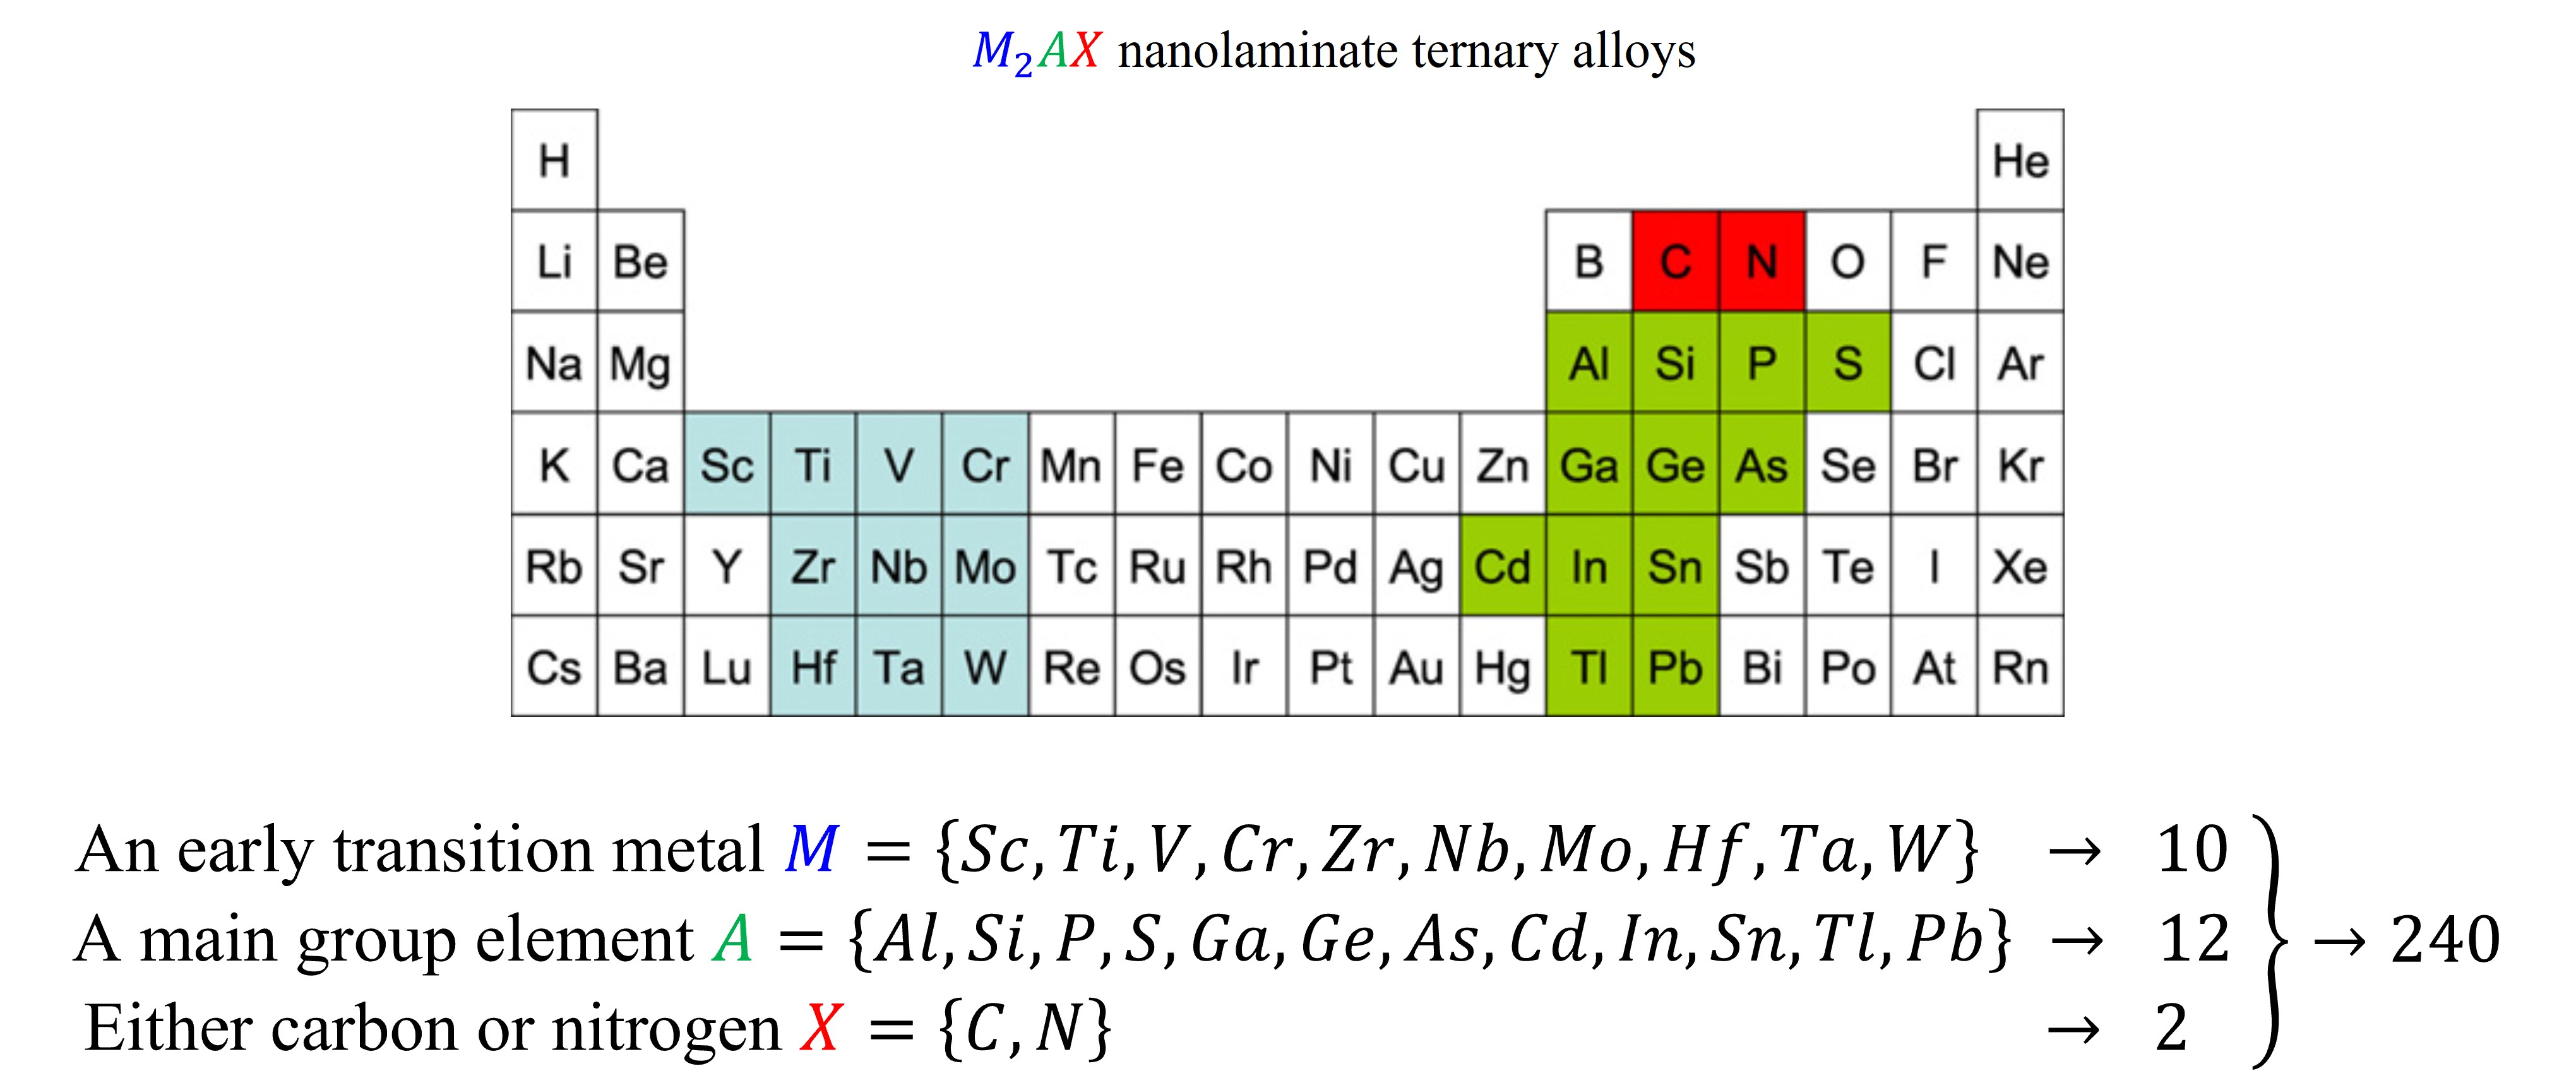

In [40]:
from IPython import display
display.Image("M2AX.jpg")

## 2. Importing the libraries

In [41]:
import pandas as pd
import numpy as np

# matminer
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf

# pymatgen
from pymatgen.core import Composition

## 3. Reading the data file that has M<sub>2</sub>AX alloys, their atom types, bulk, shear and Young modulus 
>- The file contains the s, p and d orbital radii of the atoms

In [42]:
data = pd.read_csv('./data_M.csv')
data.head()

Msiteelement Asiteelement Xsiteelement  Matomporbitalradii  \
0           Sc           Cd            C                 0.5   
1           Sc           Tl            C                 0.5   
2           Sc           In            C                 0.5   
3           Sc           Pb            C                 0.5   
4           Sc           Al            C                 0.5   

   Matomdorbitalradii  Matomsorbitalradii  Aatomsorbitalradii  \
0               0.539                1.57               0.445   
1               0.539                1.57               1.060   
2               0.539                1.57               1.093   
3               0.539                1.57               1.010   
4               0.539                1.57               1.044   

   Aatomporbitalradii  Xatomsorbitalradii  Xatomporbitalradii  BBulkmodulus  \
0               1.184                0.62               0.596            73   
1               1.319                0.62               0.596            84   
2               1.382                0.62               0.596            86   
3               1.215                0.62               0.596            87   
4               1.312                0.62               0.596            88   

   GShearmodulus  EYoungsmodulus  
0             36              92  
1             55             135  
2             54             135  
3             58             142  
4             57             140

In [43]:
data.columns

Index(['Msiteelement', 'Asiteelement', 'Xsiteelement', 'Matomporbitalradii',
       'Matomdorbitalradii', 'Matomsorbitalradii', 'Aatomsorbitalradii',
       'Aatomporbitalradii', 'Xatomsorbitalradii', 'Xatomporbitalradii',
       'BBulkmodulus', 'GShearmodulus', 'EYoungsmodulus'],
      dtype='object')

In [44]:
# Saving only atom types and Modulus in data2
data2 = data[['Msiteelement', 'Asiteelement', 'Xsiteelement', 'BBulkmodulus', 'GShearmodulus', 'EYoungsmodulus']]

In [45]:
data2

Msiteelement Asiteelement Xsiteelement  BBulkmodulus  GShearmodulus  \
0             Sc           Cd            C            73             36   
1             Sc           Tl            C            84             55   
2             Sc           In            C            86             54   
3             Sc           Pb            C            87             58   
4             Sc           Al            C            88             57   
..           ...          ...          ...           ...            ...   
218            W            P            C           242             45   
219           Ta            P            C           243            151   
220           Ta            S            N           246            109   
221            W           Si            C           251             95   
222           Ta            P            N           255            122   

     EYoungsmodulus  
0                92  
1               135  
2               135  
3               142  
4               140  
..              ...  
218             126  
219             375  
220             285  
221             253  
222             315  

[223 rows x 6 columns]

## 4. Adding features from matminer  

In [47]:
# Adding a column called alloy that is formed by combination of atoms in columns 1, 2 and 3
data2['Alloy'] = data2['Msiteelement'] + '2' + data2['Asiteelement'] + data2['Xsiteelement']
data2.head()

C:\Users\17654\AppData\Local\Temp\ipykernel_19736\494317640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Alloy'] = data2['Msiteelement'] + '2' + data2['Asiteelement'] + data2['Xsiteelement']


Msiteelement Asiteelement Xsiteelement  BBulkmodulus  GShearmodulus  \
0           Sc           Cd            C            73             36   
1           Sc           Tl            C            84             55   
2           Sc           In            C            86             54   
3           Sc           Pb            C            87             58   
4           Sc           Al            C            88             57   

   EYoungsmodulus   Alloy  
0              92  Sc2CdC  
1             135  Sc2TlC  
2             135  Sc2InC  
3             142  Sc2PbC  
4             140  Sc2AlC

In [48]:
# Composition from pymatgen helps to get atoms from a composition
def find_composition(x):
    return Composition(x)

data2['Com'] = data2['Alloy'].apply(find_composition)

C:\Users\17654\AppData\Local\Temp\ipykernel_19736\2641015494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Com'] = data2['Alloy'].apply(find_composition)


In [49]:
data2

Msiteelement Asiteelement Xsiteelement  BBulkmodulus  GShearmodulus  \
0             Sc           Cd            C            73             36   
1             Sc           Tl            C            84             55   
2             Sc           In            C            86             54   
3             Sc           Pb            C            87             58   
4             Sc           Al            C            88             57   
..           ...          ...          ...           ...            ...   
218            W            P            C           242             45   
219           Ta            P            C           243            151   
220           Ta            S            N           246            109   
221            W           Si            C           251             95   
222           Ta            P            N           255            122   

     EYoungsmodulus   Alloy          Com  
0                92  Sc2CdC  (Sc, Cd, C)  
1               135  Sc2TlC  (Sc, Tl, C)  
2               135  Sc2InC  (Sc, In, C)  
3               142  Sc2PbC  (Sc, Pb, C)  
4               140  Sc2AlC  (Sc, Al, C)  
..              ...     ...          ...  
218             126    W2PC    (W, P, C)  
219             375   Ta2PC   (Ta, P, C)  
220             285   Ta2SN   (Ta, S, N)  
221             253   W2SiC   (W, Si, C)  
222             315   Ta2PN   (Ta, P, N)  

[223 rows x 8 columns]

In [53]:
# proprties such as Stoichiometry, ElementProperty, ValenceOrbital, IonProperty are extracted from matminer
f =  MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                         cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])

In [54]:
out = f.featurize_many(data2['Com'], ignore_errors=True) 

MultipleFeaturizer: 100%|██████████| 223/223 [00:07<00:00, 29.16it/s]


In [75]:
# features from matminer for M2AX alloy
df = pd.DataFrame(out)
df.head()

0         1         2         3         4         5    6     7     8    \
0    3  0.612372  0.538609  0.506099  0.501109  0.500098  6.0  48.0  42.0   
1    3  0.612372  0.538609  0.506099  0.501109  0.500098  6.0  81.0  75.0   
2    3  0.612372  0.538609  0.506099  0.501109  0.500098  6.0  49.0  43.0   
3    3  0.612372  0.538609  0.506099  0.501109  0.500098  6.0  82.0  76.0   
4    3  0.612372  0.538609  0.506099  0.501109  0.500098  6.0  21.0  15.0   

     9    ...     135     136    137  138   139  140  141    142       143  \
0  24.00  ...  194.00   0.000  194.0  2.0  0.50  3.0  0.0  False  0.298143   
1  32.25  ...  194.00   0.000  194.0  2.0  0.75  3.0  3.5  False  0.298143   
2  24.25  ...  180.25  20.625  194.0  2.0  0.75  3.0  0.0  False  0.298143   
3  32.50  ...  201.75  11.625  194.0  2.0  1.00  3.0  3.5  False  0.298143   
4  15.25  ...  201.75  11.625  194.0  2.0  0.75  0.5  0.0  False  0.298143   

        144  
0  0.051176  
1  0.051515  
2  0.051271  
3  0.064220  
4  0.051593  

[5 rows x 145 columns]

In [77]:
# some of the columns have std of 0.0
df.describe()

0           1           2             3           4           5    \
count  223.0  223.000000  223.000000  2.230000e+02  223.000000  223.000000   
mean     3.0    0.612372    0.538609  5.060994e-01    0.501109    0.500098   
std      0.0    0.000000    0.000000  1.112721e-16    0.000000    0.000000   
min      3.0    0.612372    0.538609  5.060994e-01    0.501109    0.500098   
25%      3.0    0.612372    0.538609  5.060994e-01    0.501109    0.500098   
50%      3.0    0.612372    0.538609  5.060994e-01    0.501109    0.500098   
75%      3.0    0.612372    0.538609  5.060994e-01    0.501109    0.500098   
max      3.0    0.612372    0.538609  5.060994e-01    0.501109    0.500098   

              6           7           8           9    ...         134  \
count  223.000000  223.000000  223.000000  223.000000  ...  223.000000   
mean     6.475336   53.452915   46.977578   32.534753  ...   72.318386   
std      0.500515   20.909420   20.915843   11.962012  ...   61.951899   
min      6.000000   21.000000   14.000000   15.250000  ...    0.000000   
25%      6.000000   40.000000   33.000000   24.250000  ...   34.000000   
50%      6.000000   49.000000   42.000000   30.500000  ...   35.000000   
75%      7.000000   73.000000   67.000000   42.000000  ...   90.000000   
max      7.000000   82.000000   76.000000   59.250000  ...  227.000000   

              135         136         137         138         139         140  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean   194.577354   26.755045  213.932735    1.854260    1.068386    3.206278   
std     20.145163   21.894719   17.369071    0.227733    0.291738    1.352361   
min    146.000000    0.000000  194.000000    1.500000    0.500000    0.500000   
25%    180.500000   12.500000  194.000000    1.500000    0.750000    2.000000   
50%    198.250000   17.500000  229.000000    2.000000    1.000000    3.500000   
75%    211.500000   31.250000  229.000000    2.000000    1.250000    4.250000   
max    219.750000   80.750000  229.000000    2.000000    1.750000    5.000000   

              141         143         144  
count  223.000000  223.000000  223.000000  
mean     2.589686    0.321527    0.058008  
std      3.427634    0.132397    0.025020  
min      0.000000    0.031881    0.004015  
25%      0.000000    0.201983    0.037423  
50%      0.000000    0.314924    0.056880  
75%      7.000000    0.430217    0.076993  
max     10.500000    0.530882    0.111591  

[8 rows x 144 columns]

In [80]:
df = df.loc[:, df.std()> 1e-6]
df.head()

6     7     8      9       10    11    12    13    14     15   ...     135  \
0  6.0  48.0  42.0  24.00  12.000  21.0  11.0  77.0  66.0  42.25  ...  194.00   
1  6.0  81.0  75.0  32.25  24.375  21.0  11.0  77.0  66.0  43.75  ...  194.00   
2  6.0  49.0  43.0  24.25  12.375  21.0  11.0  77.0  66.0  43.50  ...  180.25   
3  6.0  82.0  76.0  32.50  24.750  21.0  11.0  81.0  70.0  45.00  ...  201.75   
4  6.0  21.0  15.0  15.25   5.750  21.0  11.0  77.0  66.0  43.00  ...  201.75   

      136    137  138   139  140  141    142       143       144  
0   0.000  194.0  2.0  0.50  3.0  0.0  False  0.298143  0.051176  
1   0.000  194.0  2.0  0.75  3.0  3.5  False  0.298143  0.051515  
2  20.625  194.0  2.0  0.75  3.0  0.0  False  0.298143  0.051271  
3  11.625  194.0  2.0  1.00  3.0  3.5  False  0.298143  0.064220  
4  11.625  194.0  2.0  0.75  0.5  0.0  False  0.298143  0.051593  

[5 rows x 120 columns]

In [83]:
df['Msiteelement'] = data2['Msiteelement']
df['Asiteelement'] = data2['Asiteelement']
df['Xsiteelement'] = data2['Xsiteelement']

df['BBulkmodulus'] = data2['BBulkmodulus']
df['GShearmodulus'] = data2['GShearmodulus']
df['EYoungsmodulus'] = data2['EYoungsmodulus']

In [84]:
df.head()

6     7     8      9      10    11    12    13    14     15  ...  141  \
0  6.0  48.0  42.0  24.00  12.000  21.0  11.0  77.0  66.0  42.25  ...  0.0   
1  6.0  81.0  75.0  32.25  24.375  21.0  11.0  77.0  66.0  43.75  ...  3.5   
2  6.0  49.0  43.0  24.25  12.375  21.0  11.0  77.0  66.0  43.50  ...  0.0   
3  6.0  82.0  76.0  32.50  24.750  21.0  11.0  81.0  70.0  45.00  ...  3.5   
4  6.0  21.0  15.0  15.25   5.750  21.0  11.0  77.0  66.0  43.00  ...  0.0   

     142       143       144  Msiteelement  Asiteelement  Xsiteelement  \
0  False  0.298143  0.051176            Sc            Cd             C   
1  False  0.298143  0.051515            Sc            Tl             C   
2  False  0.298143  0.051271            Sc            In             C   
3  False  0.298143  0.064220            Sc            Pb             C   
4  False  0.298143  0.051593            Sc            Al             C   

   BBulkmodulus  GShearmodulus  EYoungsmodulus  
0            73             36              92  
1            84             55             135  
2            86             54             135  
3            87             58             142  
4            88             57             140  

[5 rows x 126 columns]

In [85]:
df.to_csv('./data_Matminer.csv')